In [3]:
from multiprocessing import Pool
from itertools import product
import numpy as np

import axelrod as axl
from axelrod.strategy_transformers import MixedTransformer

states = [('C', 'C'), ('C', 'D'), ('D', 'C'), ('D', 'D')]
scores = {('C', 'C'):3,
          ('C', 'D'):0,
          ('D', 'C'):5,
          ('D', 'D'):1}


def coordinate_to_value(coords):
    strategies = [axl.Cooperator, axl.Defector]
    probe_strategy =  MixedTransformer(coords, strategies)(axl.TitForTat)
    players = (axl.WinStayLoseShift(), probe_strategy())
    match = axl.Match(players, 50)
    match.play()
    
    dist = dict(match.normalised_state_distribution())
    try:
        score = sum([scores[state] * dist[state] for state in states])
    except:
        score = 0
    
    return coords, score


granularity = 0.001
coordinates = list(product(np.arange(0,1, granularity), np.arange(0,1, granularity)))
p = Pool(4)
scores = p.map(coordinate_to_value, coordinates)

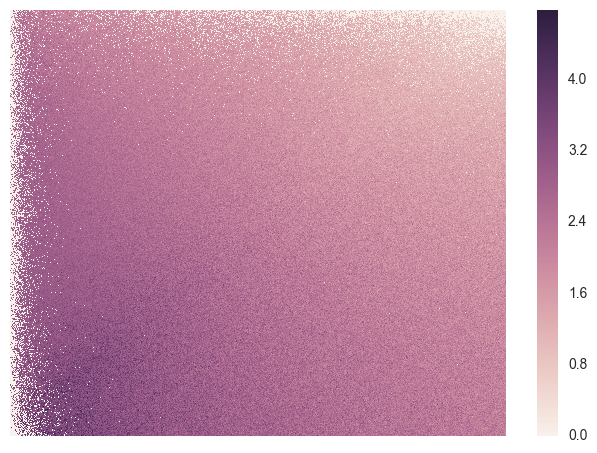

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
scores.sort()
# print(scores)
xs = set([i[0][0] for i in scores])
ys = set([i[0][1] for i in scores])
values = np.array([i[1] for i in scores])

clean_data = np.array(values).reshape(len(xs), len(ys))

sns.heatmap(clean_data, xticklabels=False, yticklabels=False)
plt.show()
plt.savefig('heatmap')

The below code is what I plan to put into axelrod

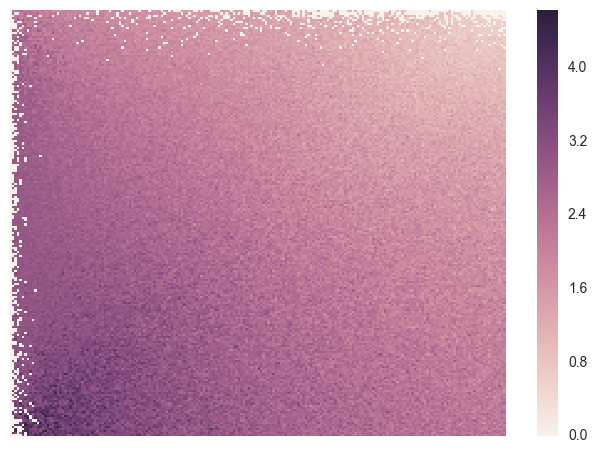

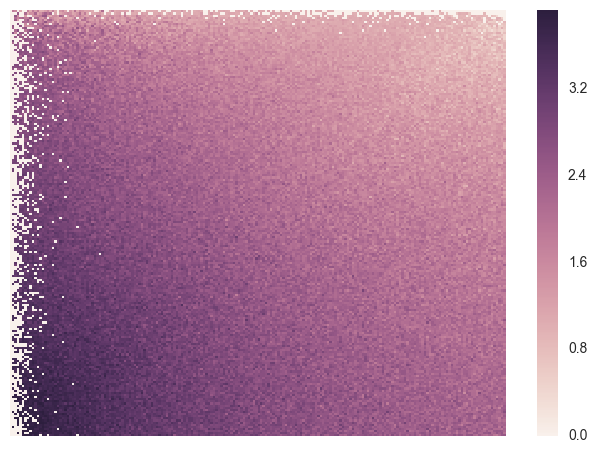

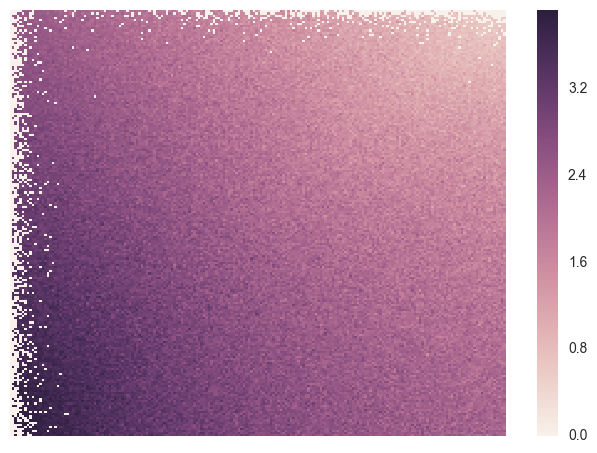

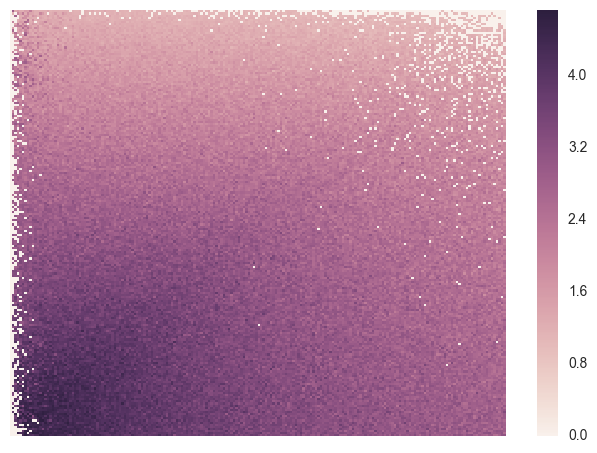

In [39]:
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool
from itertools import product
import numpy as np

import axelrod as axl
from axelrod.strategy_transformers import MixedTransformer

states = [('C', 'C'), ('C', 'D'), ('D', 'C'), ('D', 'D')]
scores = {('C', 'C'):3,
          ('C', 'D'):0,
          ('D', 'C'):5,
          ('D', 'D'):1}

def expected_value(fingerprint_strat, probe_strat, turns, coords):
    strategies = [axl.Cooperator, axl.Defector]
    probe_strategy =  MixedTransformer(coords, strategies)(probe_strat)
    players = (fingerprint_strat(), probe_strategy())
    match = axl.Match(players, turns)
    match.play()
    
    dist = dict(match.normalised_state_distribution())
    try:
        score = sum([scores[state] * dist[state] for state in states])
    except:
        score = 0
    
    return coords, score


def fingerprint(fingerprint_strat, probe_strat, turns, granularity, cores, name="heatmap"):
    coordinates = list(product(np.arange(0,1, granularity), np.arange(0,1, granularity)))
    p = Pool(cores)
    
    func = partial(expected_value, fingerprint_strat, probe_strat, turns)
    scores = p.map(func, coordinates)
    scores.sort()

    xs = set([i[0][0] for i in scores])
    ys = set([i[0][1] for i in scores])
    values = np.array([i[1] for i in scores])

    clean_data = np.array(values).reshape(len(xs), len(ys))

    sns.heatmap(clean_data, xticklabels=False, yticklabels=False)
    plt.show()
    plt.savefig(name)
    
fingerprint(axl.WinStayLoseShift, axl.TitForTat, 100, 0.005, 4, 'WinStayLoseShift')
fingerprint(axl.WinShiftLoseStay, axl.TitForTat, 100, 0.005, 4, 'WinShiftLoseStay')
fingerprint(axl.Alternator, axl.TitForTat, 100, 0.005, 4, 'Alternator')
fingerprint(axl.Davis, axl.TitForTat, 100, 0.005, 4, 'Davis')